In [1]:
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from osprey.actions.post_reader import postreader_averaged

In [2]:
data = postreader_averaged(expname='lfr0', startyear=1990, endyear=2020, varname='thetao', diagname='timeseries')

 Averaged data found 


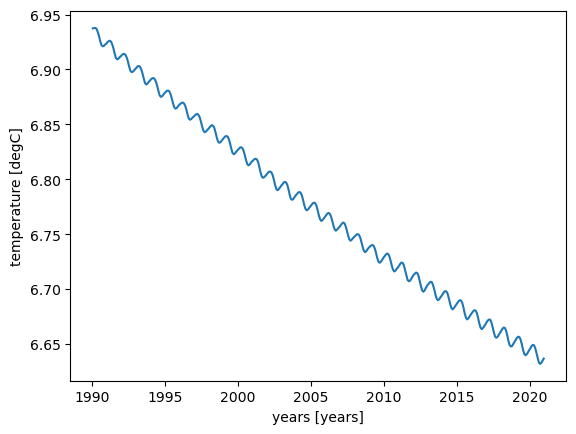

In [5]:
data['thetao'].plot()